# Applying the perceptron theory
Although we're going to use the `tensorflow` library, we're going to mainly use the high level library [`keras`](https://keras.io/), that was previously standalone but got integrated into the newer version of tensorflow when it's author, [Francois Chollet](https://twitter.com/fchollet?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor), went to work for Google.

We'll be coding the same neural network as we did in for `pytorch`. Make sure to review it before diving into this chapter, as I will not re-explain everything.

In [116]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils

from keras.utils.np_utils import to_categorical


Just like the previous chapter, load the same dataset using the same method. However, no need to convert them to tensors, as we are not using `pytorch` anymore.

In [117]:
# TO COMPLETE:  Load dataset
filename = "./data/iris.csv"
df = pd.read_csv(filename)
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
df.head()
print(df.shape)
print(df["species"].value_counts())

(150, 5)
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64


c:\miniconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


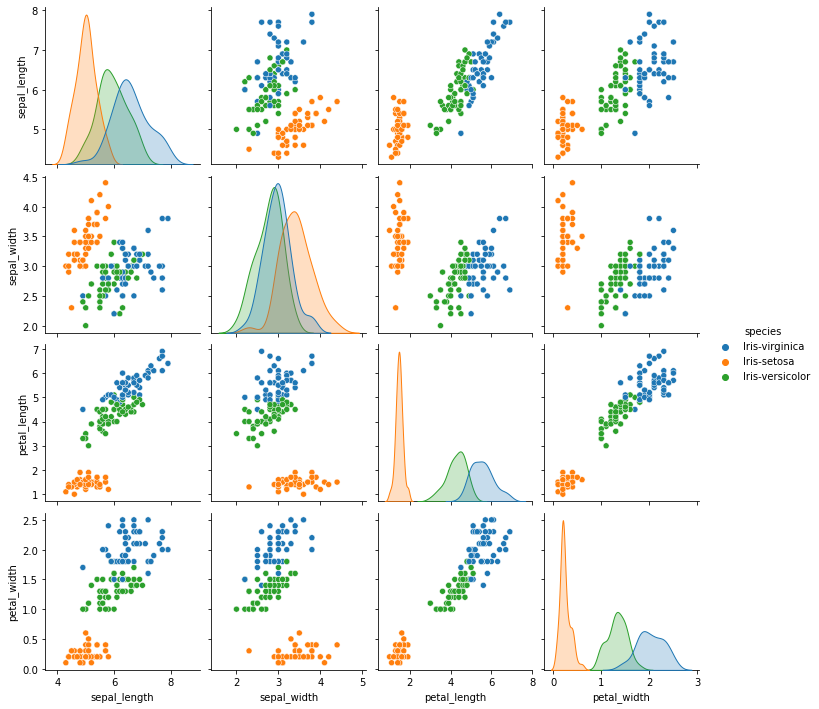

In [27]:
# Visualize data with Seaborn
g=sns.pairplot(df, hue="species", size= 2.5)

In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.5,2.8,4.6,1.5,Iris-versicolor
1,5.4,3.4,1.7,0.2,Iris-setosa
2,6.4,3.1,5.5,1.8,Iris-virginica
3,6.0,2.2,4.0,1.0,Iris-versicolor
4,5.1,3.8,1.9,0.4,Iris-setosa


In [118]:
Y=df["species"]
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

In [126]:
# Creating a test/train split
train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index] # from first to split_index
df_test = df[split_index:]
X_train = df_train.drop('species', axis = 1).values
X_test = df_test.drop('species', axis = 1).values

y_train = Y[:split_index]
y_test = Y[split_index:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]

In [120]:
# Setting some constants
nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['species']))
nb_features= X_train.shape[1]
batch_size = 1
nb_classes

3

In [121]:
training_size = X_train.shape[1]
test_size = X_test.shape[1]
num_features = 4
num_labels = 3


num_hidden = 10


In `keras`, there are [three ways](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/) to build a neural network. We are going to focus on the `Sequential` mode, so that you can see different ways of building one. In `pytorch`, we mostly did something similar to the model subclassing and functional approach of keras.

Here below, we want you to construct the model architecture; the same one that was used in the previous chapter. You see a recap below.

*Hint: a linear layer in keras is `keras.layers.Dense`*

In [ ]:
#TO COMPLETE: Build the model with `model.build()`. You might need to specify the `input_shape`.


In [127]:
model = Sequential()
model.add(Dense(num_hidden, input_dim = num_features , activation = 'relu'))
model.add(Dense(num_hidden, activation = 'relu'))
model.add(Dense(num_labels, activation = 'softmax'))

In [100]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                50        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


`model.summary()` should return the following if you've done everything right

```
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
=================================================================
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
```

In [128]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=10,
)

Fit model on training data
Epoch 1/10
120/120 [==============================] - 1s 3ms/step - loss: 1.4328 - accuracy: 0.3833
Epoch 2/10
120/120 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.3750
Epoch 3/10
120/120 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.7833
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.8083
Epoch 5/10
120/120 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.8000
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.9083
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.9333
Epoch 8/10
120/120 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.9333
Epoch 9/10
120/120 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.9500
Epoch 10/10
120/120 [==============================] - 0s 2ms/step - loss

In [ ]:
# TO COMPLETE:
# - compile the model using `model.compile()` and the variables set before
# - create a variable `history`
# - fit the model and assign the result to `history`


In [64]:
#Making sure the type is correct
#X_train = X_train.astype("float32")
#y_train = y_train.astype("float32")
print(type(X_train))

<class 'numpy.ndarray'>


In [130]:
history.history

{'loss': [1.432844638824463,
  0.893760085105896,
  0.7586587071418762,
  0.6530230641365051,
  0.5675045251846313,
  0.4876163899898529,
  0.4246062636375427,
  0.3899615705013275,
  0.34474849700927734,
  0.3149842917919159],
 'accuracy': [0.38333332538604736,
  0.375,
  0.7833333611488342,
  0.8083333373069763,
  0.800000011920929,
  0.9083333611488342,
  0.9333333373069763,
  0.9333333373069763,
  0.949999988079071,
  0.949999988079071]}

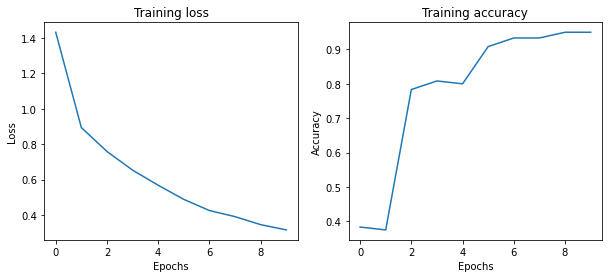

In [129]:
loss = history.history['loss']
accuracy = history.history['accuracy']
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

The loss shall decrease and the accuracy shall increase. You should get something similar to this.
![Loss and accuracy ](./assets/tf_loss_and_accuracy.png)

Moreover, testing on the testing set shall result in a (near) perfect score.

In [115]:
# TO COMPLETE: Evaluate the model on the test set.
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=1)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
30/30 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9667
test loss, test acc: [0.13738293945789337, 0.9666666388511658]
Generate predictions for 3 samples
predictions shape: (3, 3)


*Voilà*, you've seen both approaches to create a neural network. Of course, there are still MANY things to learn about `pytorch` and `keras`, we've barely even scratched the surface. But now that you know the basics, you will be able to test them out on a new project!